# Trabajo Práctico : Aprendizaje No Supervisado DiploDatos

**GRUPO 14**

CONSIGNAS:

Práctico entregable

Práctico entregable:
Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio inicial de la base.


2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.


3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?


4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración…


5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?


6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

# Inicializacion del entorno

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:
import requests
from io import BytesIO
import zipfile

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# URL del archivo comprimido en GitHub
zip_url = 'https://github.com/Freinoso95/Diplo2023/raw/main/female_players.zip'

 #Descargar el archivo comprimido y extraer el CSV
response = requests.get(zip_url)
zip_data = BytesIO(response.content)

with zipfile.ZipFile(zip_data, 'r') as zip_ref:
    csv_filename = 'female_players.csv'

     #Leer el contenido del archivo CSV en bytes
    with zip_ref.open(csv_filename) as csv_file:
        csv_content = csv_file.read()

        # Decodificar los bytes en una cadena y luego leer con pandas
        csv_content_str = csv_content.decode('utf-8')
        df = pd.read_csv(BytesIO(csv_content_str.encode('utf-8')))

In [ ]:
df.head()

player_id                           player_url  fifa_version  fifa_update  \
0     227125       /player/227125/sam-kerr/230009            23            9   
1     227316  /player/227316/wendie-renard/230009            23            9   
2     226301    /player/226301/alex-morgan/230009            23            9   
3     227310  /player/227310/ada-hegerberg/230009            23            9   
4     227246    /player/227246/lucy-bronze/230009            23            9   

  fifa_update_date    short_name                      long_name  \
0       2023-01-13       S. Kerr              Samantha May Kerr   
1       2023-01-13     W. Renard      Wéndèleine Thérèse Renard   
2       2023-01-13     A. Morgan      Alexandra Morgan Carrasco   
3       2023-01-13  A. Hegerberg  Ada Martine Stolsmo Hegerberg   
4       2023-01-13     L. Bronze     Lucia Roberta Tough Bronze   

  player_positions  overall  potential    value_eur  wage_eur  age  \
0               ST       91         91  134500000.0    4000.0   28   
1               CB       91         91   89500000.0    3000.0   31   
2               ST       90         90          NaN       NaN   32   
3               ST       90         91  143000000.0    3000.0   26   
4               RB       89         89          NaN       NaN   30   

          dob  height_cm  weight_kg  league_id           league_name  \
0  1993-09-10        168         66     2216.0  Women's Super League   
1  1990-07-20        187         70     2218.0   Feminine Division 1   
2  1989-07-02        168         62        NaN                   NaN   
3  1995-07-10        176         68     2218.0   Feminine Division 1   
4  1991-10-28        171         65        NaN                   NaN   

   league_level  club_team_id  club_name club_position  club_jersey_number  \
0           1.0      116010.0  Chelsea W            ST                20.0   
1           1.0      116033.0     Lyon W           LCB                 3.0   
2           NaN           NaN        NaN           NaN                 NaN   
3           1.0      116033.0     Lyon W           RES                14.0   
4           NaN           NaN        NaN           NaN                 NaN   

  club_loaned_from club_joined_date  club_contract_valid_until_year  \
0              NaN       2020-01-01                          2024.0   
1              NaN       2006-07-01                          2026.0   
2              NaN              NaN                             NaN   
3              NaN       2014-07-01                          2024.0   
4              NaN              NaN                             NaN   

   nationality_id nationality_name  nation_team_id nation_position  \
0             195        Australia             NaN             NaN   
1              18           France        113003.0             LCB   
2              95    United States        113009.0              ST   
3              36           Norway        113007.0              ST   
4              14          England        113002.0              RB   

   nation_jersey_number preferred_foot  weak_foot  skill_moves  \
0                   NaN          Right          4            4   
1                   3.0          Right          3            2   
2                  13.0           Left          4            4   
3                  14.0          Right          4            4   
4                   2.0          Right          3            3   

   international_reputation    work_rate         body_type real_face  \
0                         5    High/High     Normal (170-)       Yes   
1                         5  High/Medium       Lean (185+)       Yes   
2                         5     High/Low            Unique       Yes   
3                         5  High/Medium  Normal (170-185)       Yes   
4                         5    High/High  Normal (170-185)       Yes   

   release_clause_eur                                        player_tags  \
0         275700000.0  #Aerial Threat, #Dr

# 1-Analisis Exploratorio de los datos

In [ ]:
print(df.columns[71:120])
#print(len(df.columns), 'variables')

Index(['mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181361 entries, 0 to 181360
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 152.2+ MB


In [ ]:
df.describe()

player_id   fifa_version    fifa_update        overall  \
count  181361.000000  181361.000000  181361.000000  181361.000000   
mean   234662.993907      19.223538      36.727703      76.269909   
std     10659.745380       2.060414      23.555409       5.709719   
min    226177.000000      16.000000       1.000000      49.000000   
25%    227117.000000      17.000000      16.000000      72.000000   
50%    227586.000000      19.000000      35.000000      76.000000   
75%    241226.000000      21.000000      54.000000      80.000000   
max    273050.000000      23.000000      99.000000      93.000000   

           potential     value_eur     wage_eur            age      height_cm  \
count  181361.000000  4.831000e+03  4831.000000  181361.000000  181361.000000   
mean       79.672967  1.668368e+07   818.505485      26.014099     168.756464   
std         5.422202  2.425583e+07   468.435485       3.907456       6.249204   
min        49.000000  3.250000e+05   500.000000      16.000000     150.000000   
25%        76.000000  2.600000e+06   500.000000      23.000000     164.000000   
50%        80.000000  6.500000e+06   700.000000      26.000000     170.000000   
75%        83.000000  2.050000e+07  1000.000000      29.000000     173.000000   
max        95.000000  1.735000e+08  4000.000000      41.000000     188.000000   

           weight_kg    league_id  league_level   club_team_id  \
count  181361.000000  4876.000000        4785.0    4876.000000   
mean       61.213580  2215.473749           1.0  116009.965135   
std         5.563279    11.005618           0.0     429.755946   
min        45.000000  2136.000000           1.0  113000.000000   
25%        57.000000  2216.000000           1.0  116014.000000   
50%        61.000000  2216.000000           1.0  116033.000000   
75%        65.000000  2218.000000           1.0  116039.000000   
max        84.000000  2218.000000           1.0  116416.000000   

       club_jersey_number  club_contract_valid_until_year  nationality_id  \
count         4876.000000                     4785.000000   181361.000000   
mean            14.876743                     2023.980564       69.767910   
std             10.042014                        1.326126       57.797635   
min              1.000000                     2022.000000        4.000000   
25%              7.000000                     2023.000000       27.000000   
50%             14.000000                     2023.000000       46.000000   
75%             22.000000                     2024.000000       95.000000   
max             99.000000                     2027.000000      198.000000   

       nation_team_id  nation_jersey_number      weak_foot    skill_moves  \
count   177364.000000         177364.000000  181361.000000  181361.000000   
mean    113079.558980             12.334437       3.009076       2.630395   
std        335.705441              7.179928       0.704869       0.938435   
min     112998.000000             -1.000000       1.000000       1.000000   
25%     113001.000000              6.000000       3.000000       2.000000   
50%     113006.000000             12.000000       3.000000       3.000000   
75%     113010.000000             18.000000       3.000000       3.000000   
max     116428.000000             98.000000       5.000000       5.000000   

       international_reputation  release_clause_eur           pace  \
count             181361.000000        4.750000e+03  158620.000000   
mean                   1.873975        3.688577e+07      73.402276   
std                    1.049086        5.263566e+07       9.073919   
min                    1.000000        7.150000e+05      30.000000   
25%                    1.000000        5.900000e+06      68.000000   
50%                    2.000000        1.470000e+07      74.000000   
75%                    3.000000        4.720000e+07      80.000000   
max                    5.000000        3.687000e+08      96.000000   

            shooting        passing      drib

In [ ]:
df.nunique()

player_id                           1635
player_url                        181361
fifa_version                           8
fifa_update                           99
fifa_update_date                     512
short_name                          1690
long_name                           1654
player_positions                     382
overall                               44
potential                             42
value_eur                            199
wage_eur                              14
age                                   26
dob                                 1387
height_cm                             39
weight_kg                             38
league_id                              3
league_name                            3
league_level                           1
club_team_id                          35
club_name                             35
club_position                         27
club_jersey_number                    48
club_loaned_from                       6
club_joined_date

In [ ]:
#  para encontrar valores NaN y sumarlos
valores_NaN_por_columna = df.isna().sum()

print(valores_NaN_por_columna)

player_id                              0
player_url                             0
fifa_version                           0
fifa_update                            0
fifa_update_date                       0
short_name                             0
long_name                              0
player_positions                       0
overall                                0
potential                              0
value_eur                         176530
wage_eur                          176530
age                                    0
dob                                    0
height_cm                              0
weight_kg                              0
league_id                         176485
league_name                       176485
league_level                      176576
club_team_id                      176485
club_name                         176485
club_position                     176485
club_jersey_number                176485
club_loaned_from                  181280
club_joined_date

In [ ]:
skills_ratings=df.columns[47:76]
print(skills_ratings)

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle'],
      dtype='object')


In [ ]:
df_skills_ratings = df.iloc[:, 47:76]

In [ ]:
df_skills_ratings

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                       70                   93                          91   
1                       51                   70                          96   
2                       71                   95                          86   
3                       71                   94                          93   
4                       87                   73                          82   
...                    ...                  ...                         ...   
181356                  49                   69                          66   
181357                  55                   23                          57   
181358                  43                   30                          68   
181359                  62                   62                          60   
181360                  35                   65                          65   

        attacking_short_passing  attacking_volleys  skill_dribbling  \
0                            78                 92               90   
1                            84                 55               69   
2                            91                 87               87   
3                            84                 90               91   
4                            85                 66               79   
...                         ...                ...              ...   
181356                       60                 43               64   
181357                       56                 27               38   
181358                       67                 30               40   
181359                       55                 49               62   
181360                       51                 58               58   

        skill_curve  skill_fk_accuracy  skill_long_passing  \
0                76                 68                  64   
1                65                 58                  87   
2                68                 70                  82   
3                79                 75                  72   
4                88                 81                  80   
...             ...                ...                 ...   
181356           38                 29                  53   
181357           23                 22                  35   
181358           27                 32                  61   
181359           40                 36                  61   
181360           42                 44                  40   

        skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                       92                     89                     85   
1                       85                     65                     62   
2                       93                     88                     89   
3                       91                     81                     85   
4                       85                     85                     85   
...                    ...                    ...                    ...   
181356                  58                     64                     69   
181357                  54                     61                     63   
181358                  55                     65                     64   
181359                  57                     75                     81   
181360                  63                     63                     58   

        movement_agility  movement_reactions  movement_balance  \
0                     90                  91                82   
1                     53                  90                34   
2                     83                  84                67   
3                     74                  92                47   
4                     86                  89                82   
...                  ...                 ...               ...   
181356                68                  66                71   
181357              

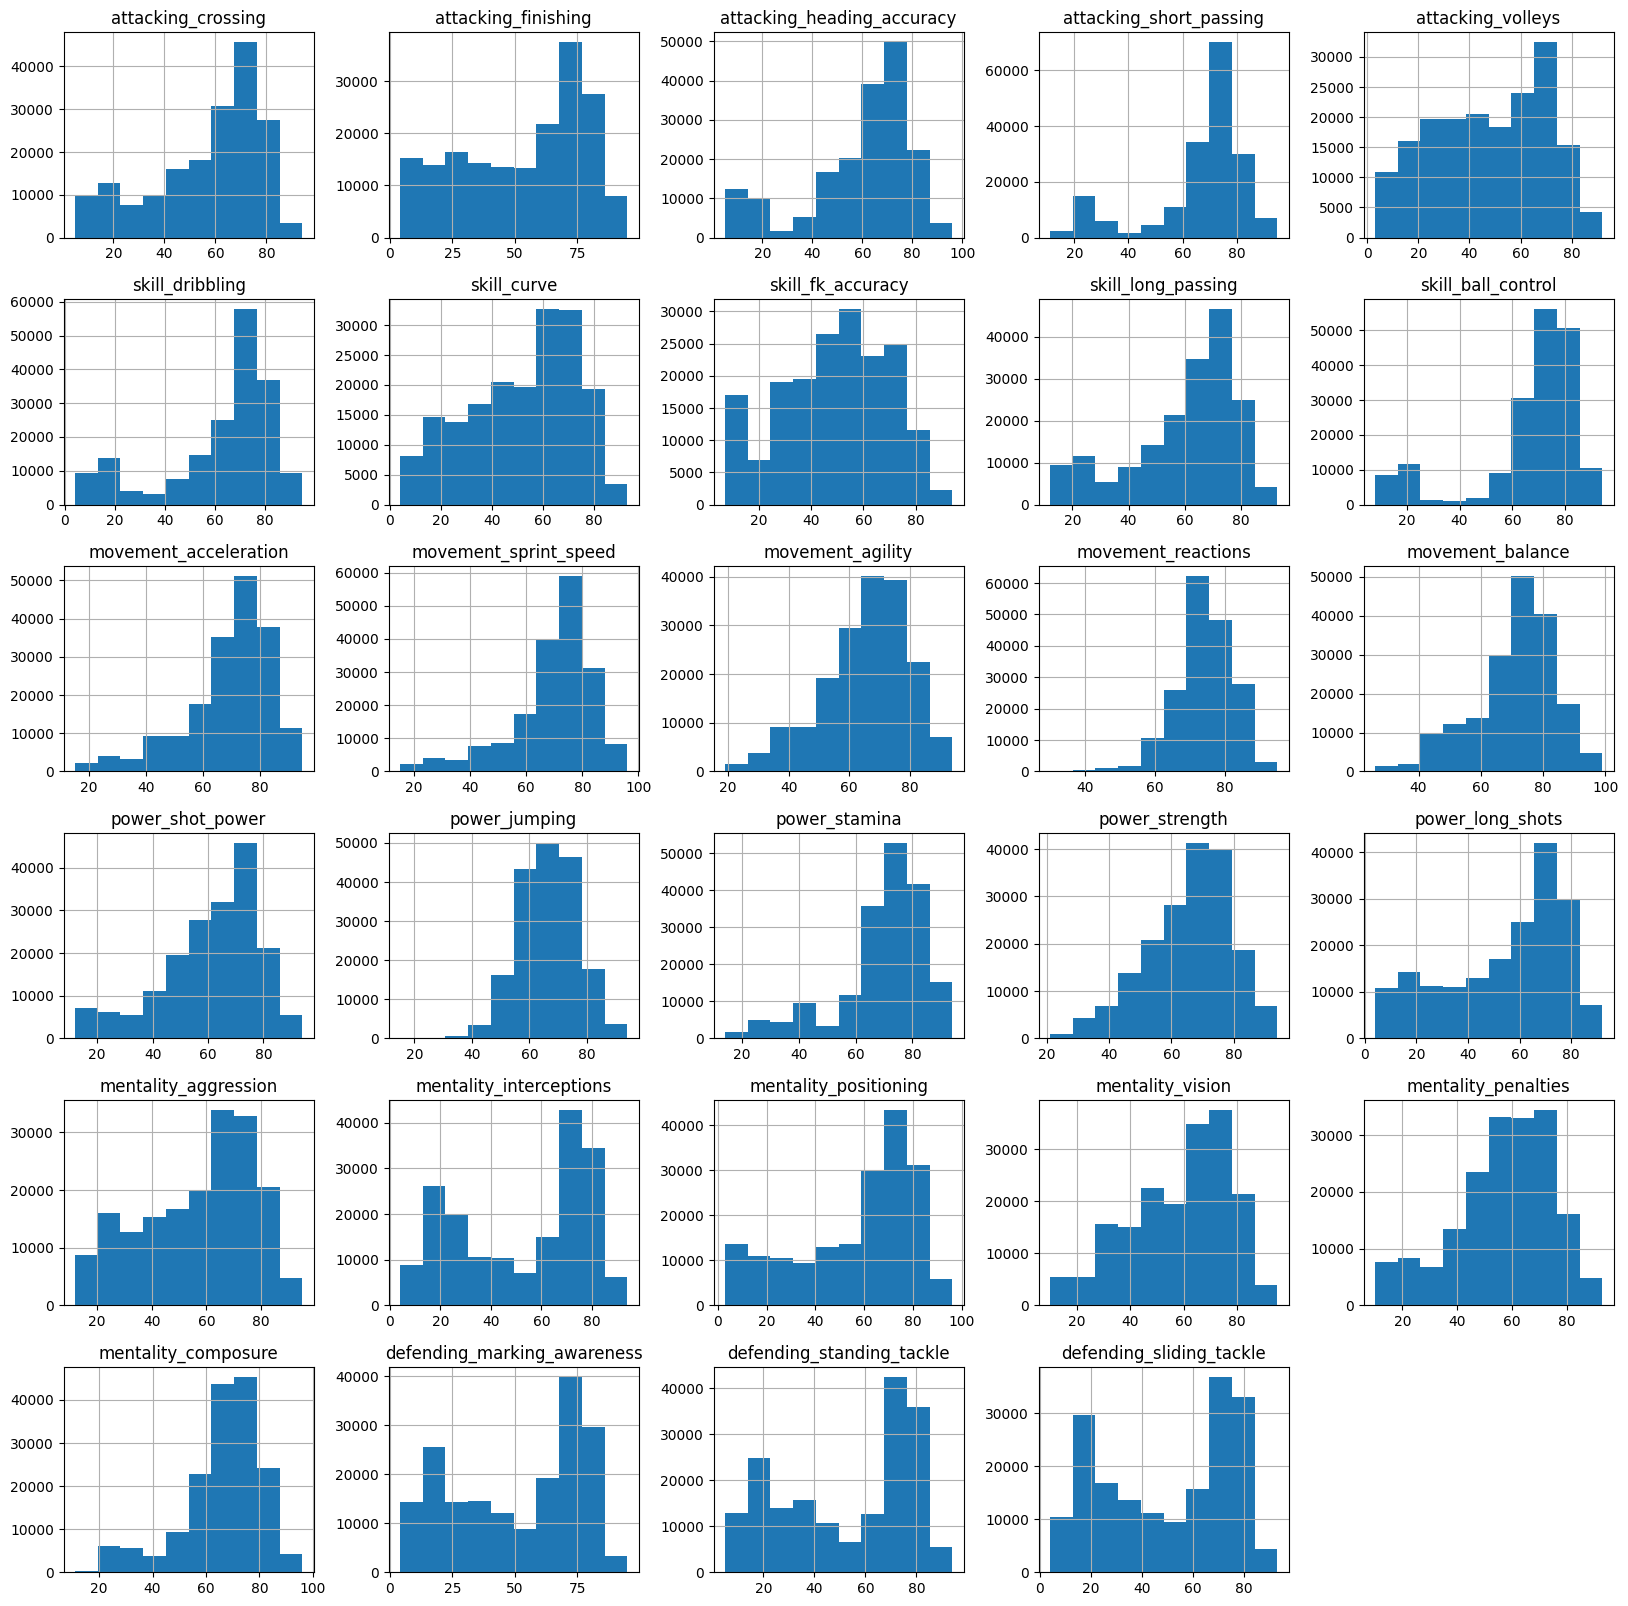

In [ ]:
# Histogramas para variables numéricas
df_skills_ratings.hist(figsize=(20, 20))
plt.show()



In [ ]:
# Seleccionar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object', 'category'])

# Mostrar las columnas categóricas
print(columnas_categoricas.columns)

Index(['player_url', 'fifa_update_date', 'short_name', 'long_name',
       'player_positions', 'dob', 'league_name', 'club_name', 'club_position',
       'club_loaned_from', 'club_joined_date', 'nationality_name',
       'nation_position', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'player_traits', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'gk', 'player_face_url'],
      dtype='object')


In [ ]:
columnas_categoricas.nunique()

player_url          181361
fifa_update_date       512
short_name            1690
long_name             1654
player_positions       382
dob                   1387
league_name              3
club_name               35
club_position           27
club_loaned_from         6
club_joined_date       222
nationality_name        54
nation_position         30
preferred_foot           2
work_rate                9
body_type                9
real_face                2
player_tags            113
player_traits          280
ls                     279
st                     279
rs                     279
lw                     191
lf                     203
cf                     203
rf                     203
rw                     191
lam                    298
cam                    298
ram                    298
lm                     283
lcm                    257
cm                     257
rcm                    257
rm                     283
lwb                    274
ldm                    287
c

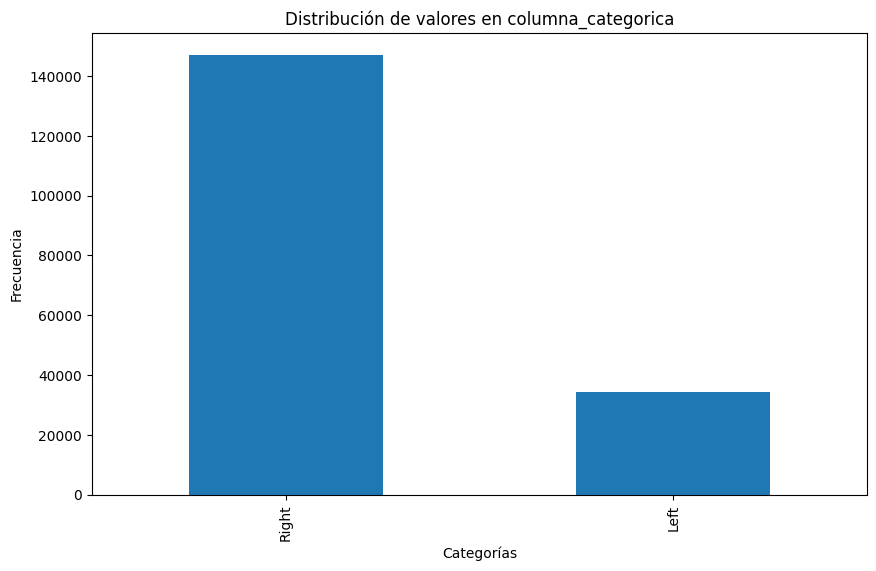

In [ ]:
# Gráfico de barras para variables categóricas
plt.figure(figsize=(10, 6))
df['preferred_foot'].value_counts().plot(kind='bar')
plt.title('Distribución de valores en columna_categorica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

# 2- Evaluación visual de a dos variables numéricas por vez.

In [ ]:
#analisis de correlación entre variables


# Calcular la matriz de correlación entre las variables
matriz_correlacion = df_skills_ratings.corr()


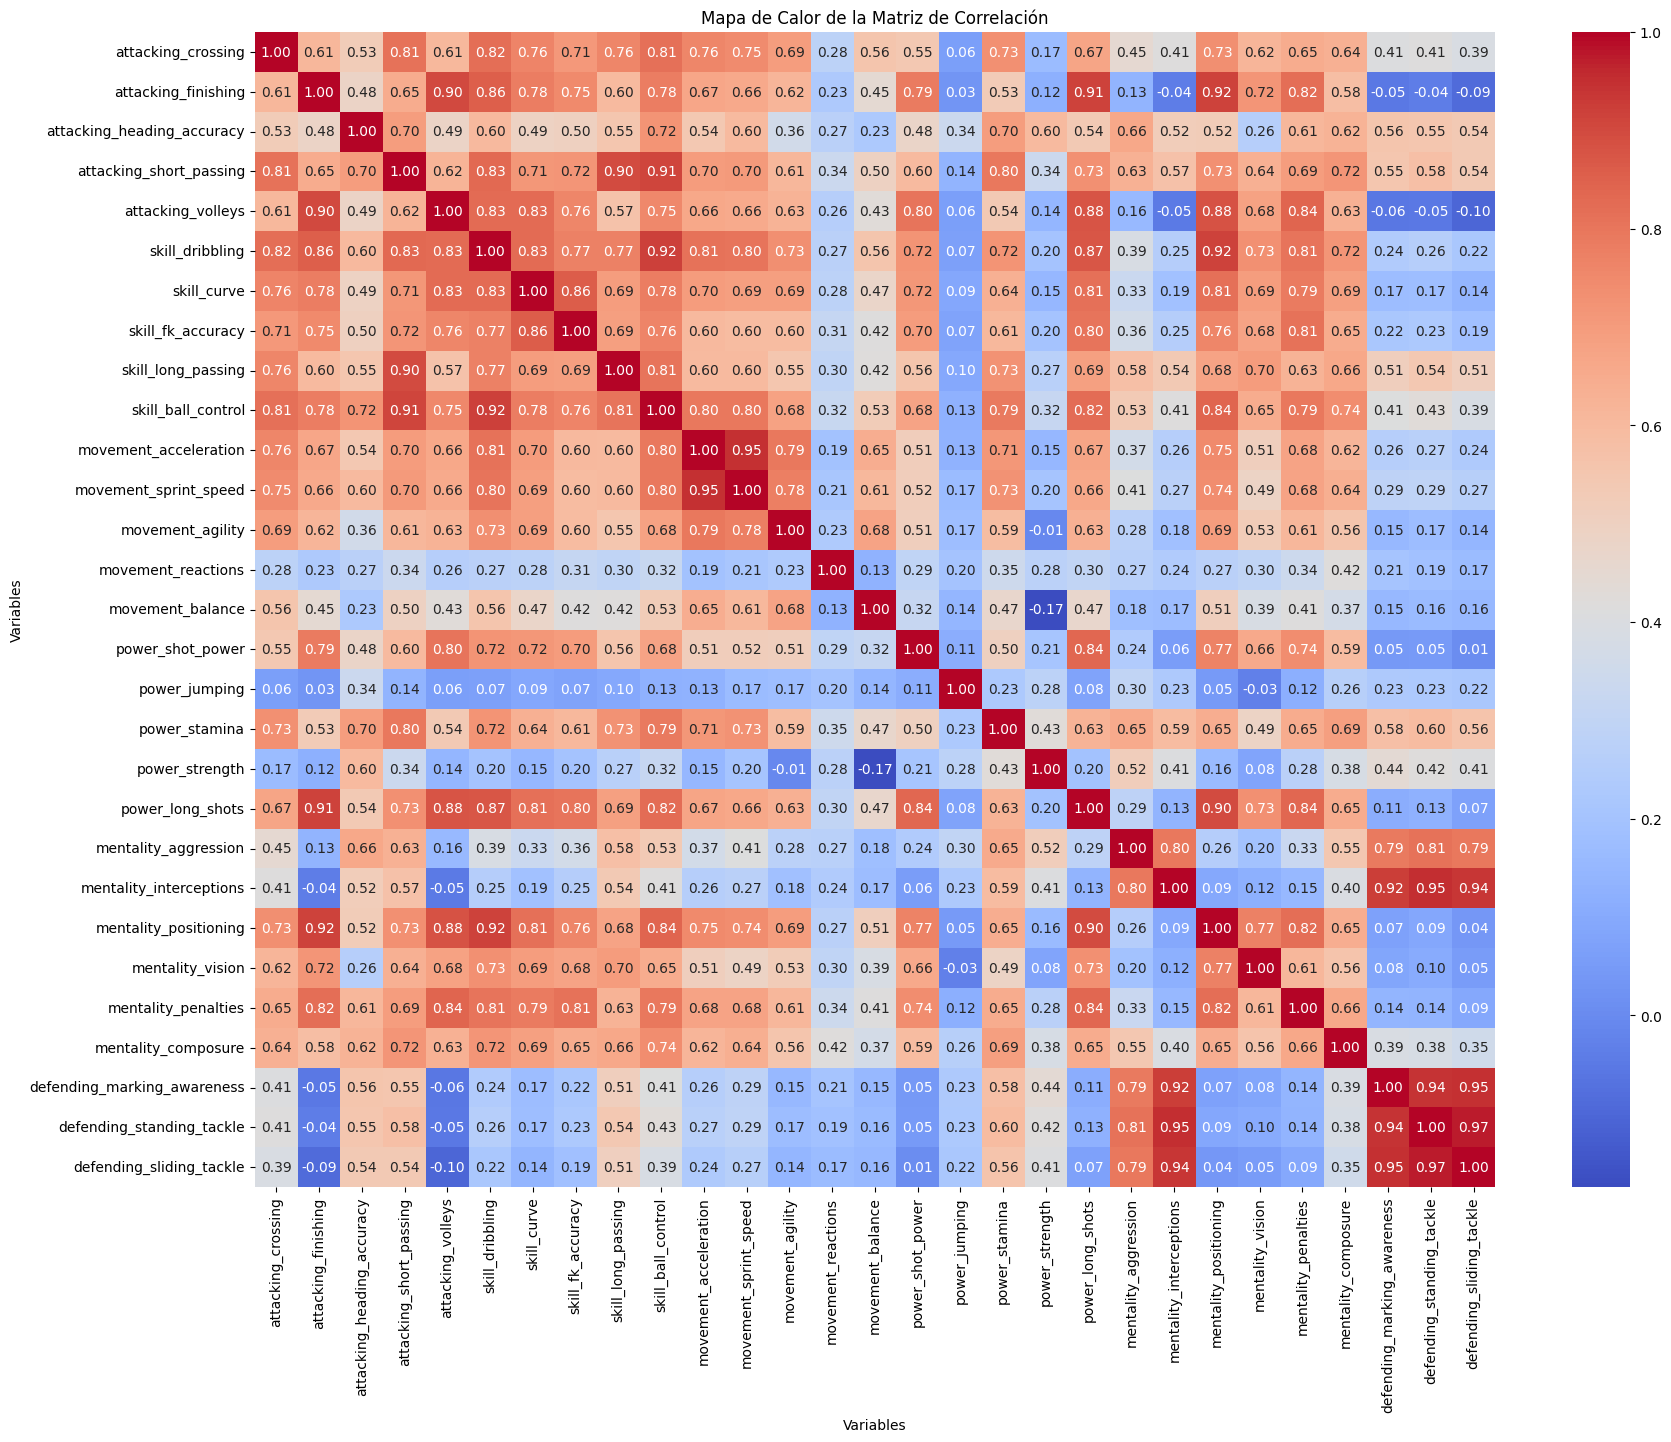

In [ ]:

# Crear una figura para el mapa de calor
plt.figure(figsize=(20,15))

# Utilizar Seaborn para crear un mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Agregar títulos y etiquetas
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar el mapa de calor
plt.show()

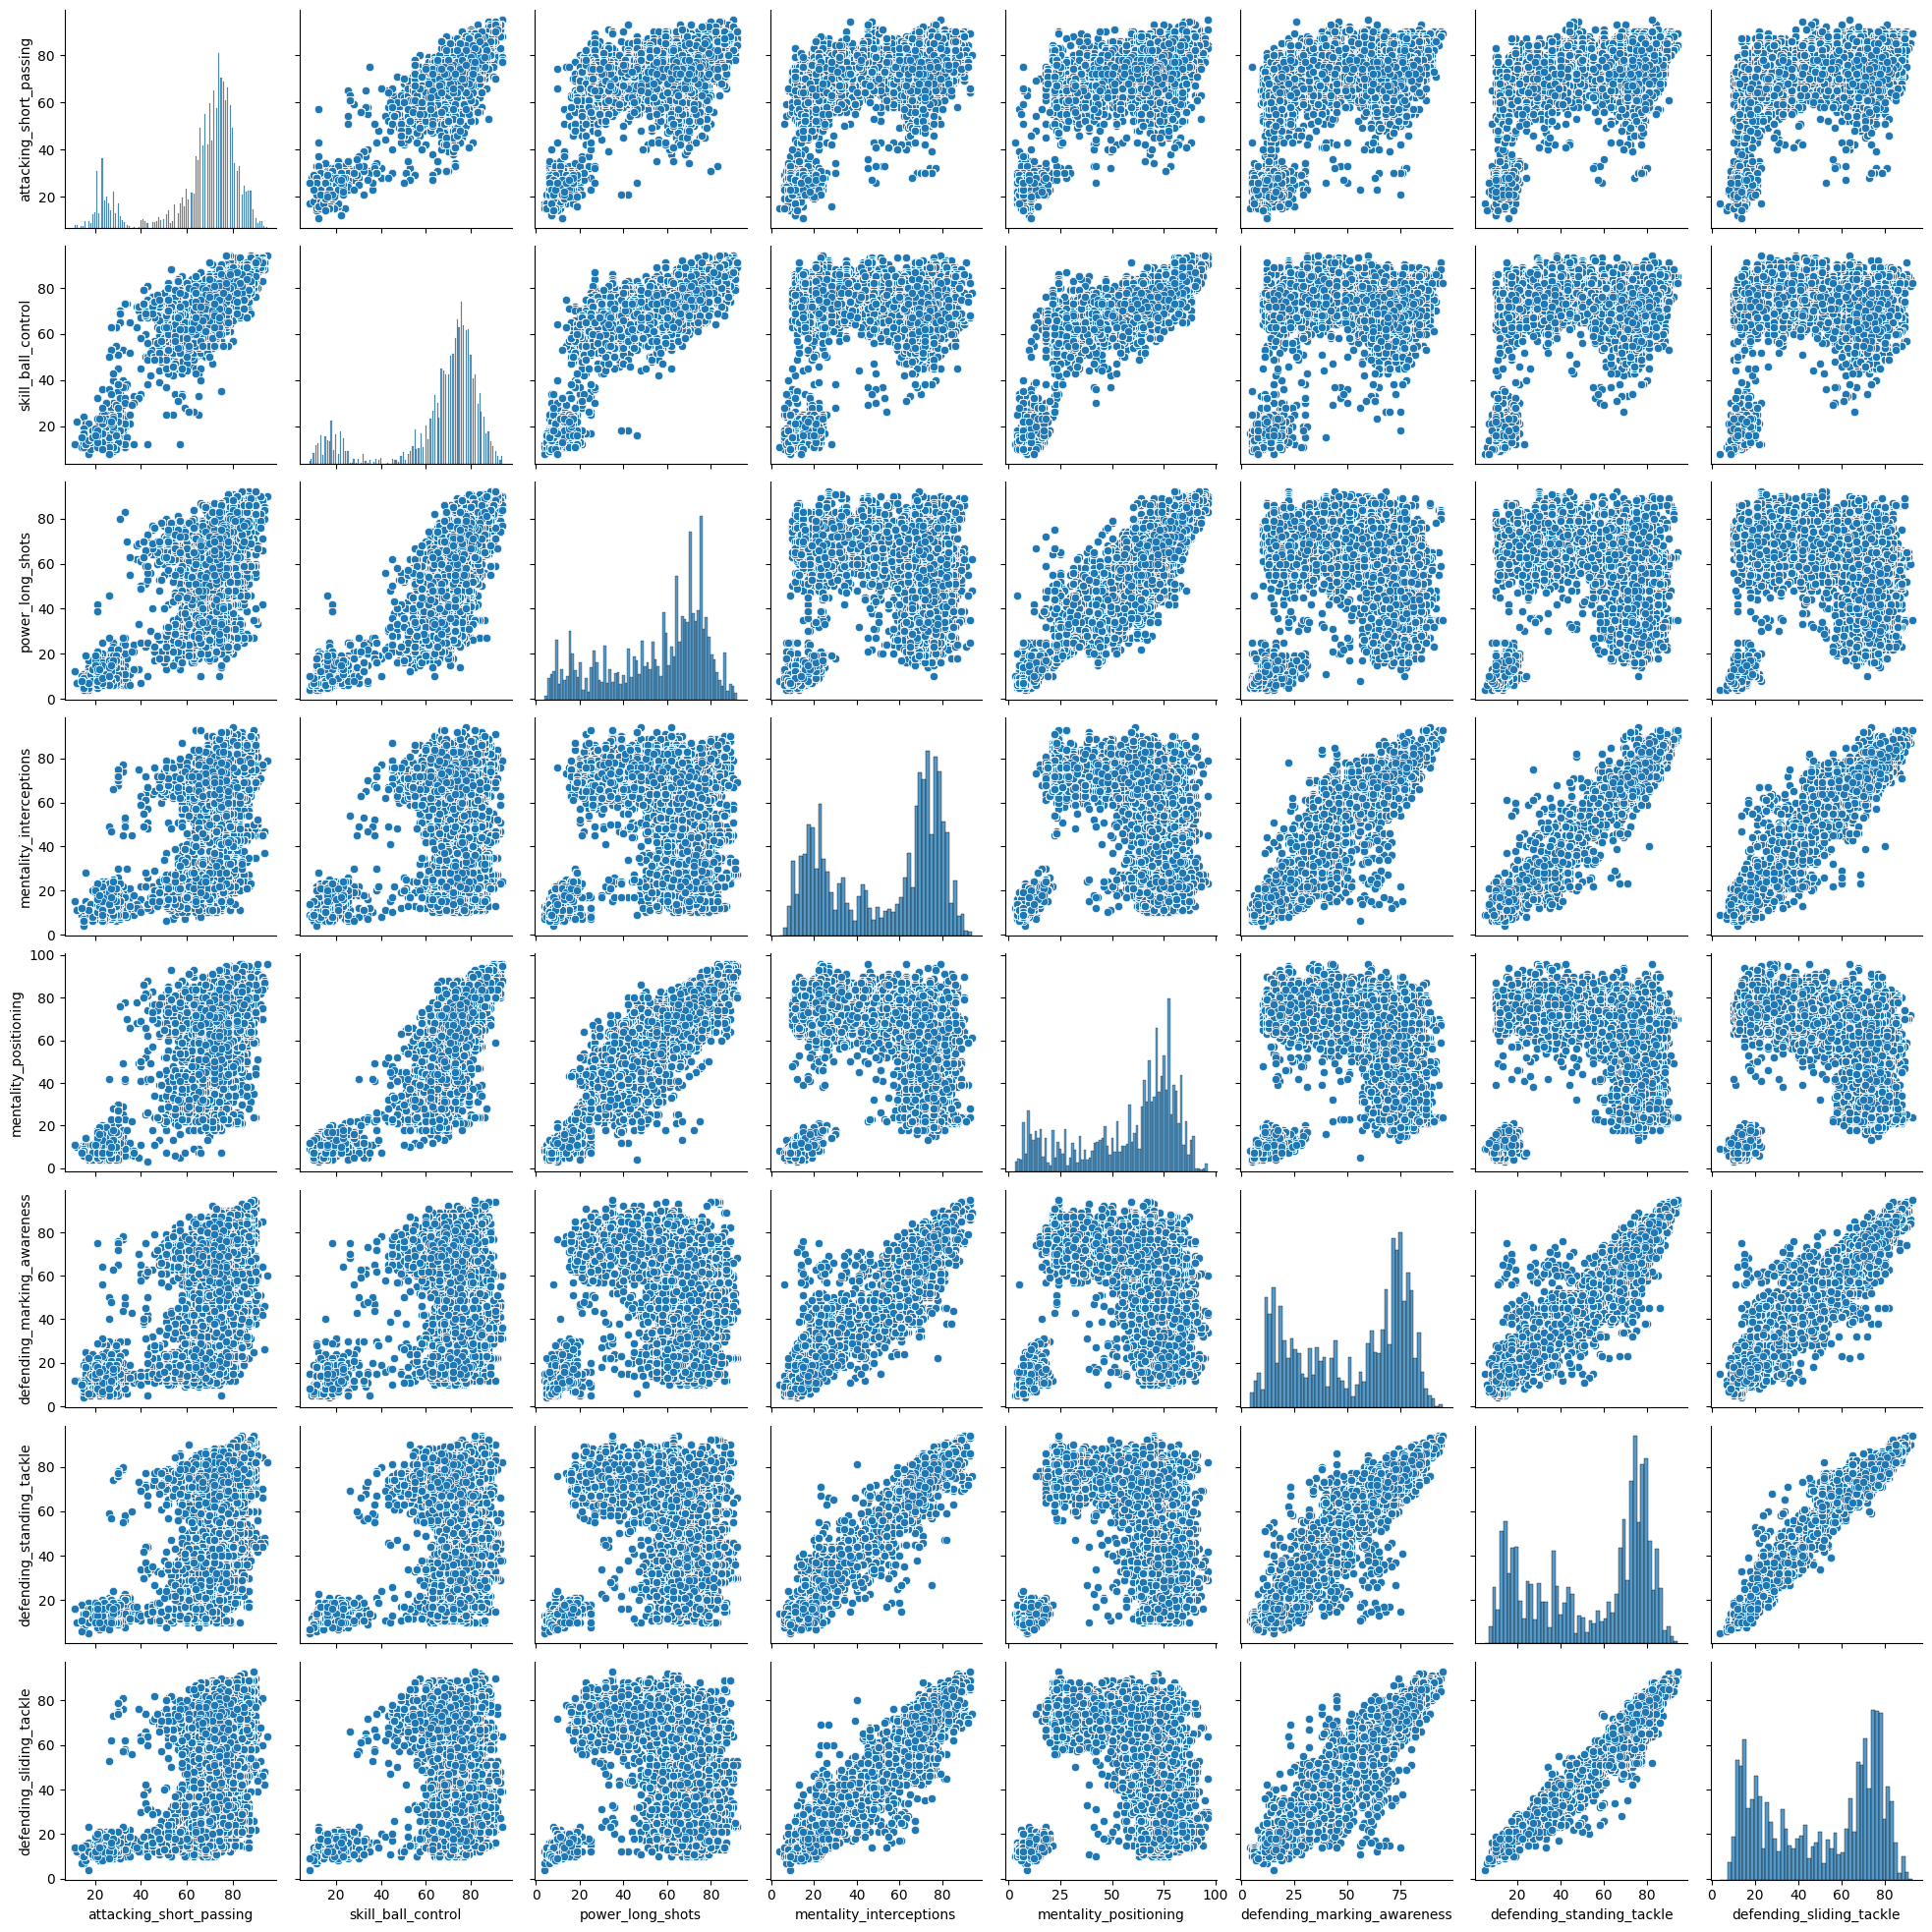

In [ ]:
#visualizamos algunas de las variables con mayor correlación que observamos en la matriz

# Selecciona las columnas que deseas incluir en el pairplot
columnas_seleccionadas = ['attacking_short_passing', 'skill_ball_control','power_long_shots','mentality_interceptions',
       'mentality_positioning','defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle']

# Crea un nuevo DataFrame con las columnas seleccionadas
df_seleccionado = df_skills_ratings[columnas_seleccionadas]

# pairplot
sns.pairplot(df_seleccionado)

plt.show()

# 3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

El análisis que realizaremos a la base de datos sera de las skills de las jugadoras, seleccionadas en df_skills_ratings, dichas variables se encuentran el rango de 0-100 por lo cual no es necesario normalizar ni escalar estos datos, porque ya lo estan.

# 4-Clustering

**Primera Técnica: K-medias**

Elegimos aplicar Kmeans con un K=5 como primer metodo de prueba

In [ ]:
df_skills_ratings = df_skills_ratings.fillna(0)

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_ratings) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)



In [ ]:
df_clusters=df_skills_ratings.copy() #hacemos copia de la base que estamos usando y agregamos a final una columna de k5 para ver donde asigno a cada jugador
df_clusters['kmeans_5'] = km.labels_ #clusters

category_counts = df_clusters['kmeans_5'].value_counts()
print(category_counts)

2    51167
4    45412
0    31632
3    30412
1    22738
Name: kmeans_5, dtype: int64


Decidimos realizar el metodo del codo ya que ayuda a encontrar un valor de K donde la varianza dentro de los clusters se reduce significativamente al aumentar K obteniendo un valor de K=4

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

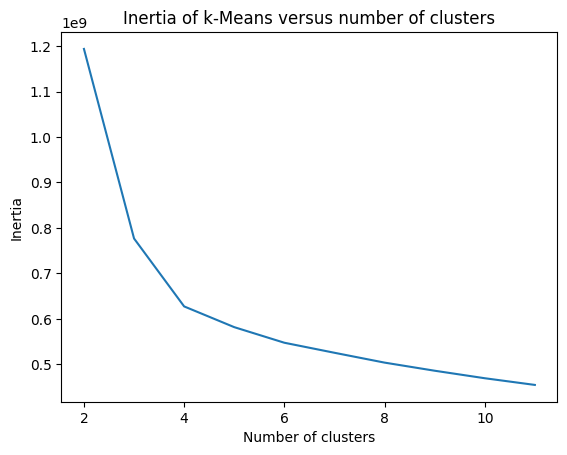

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills_ratings).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
df_skills_ratings = df_skills_ratings.fillna(0)

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills_ratings) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

df_clusters=df_skills_ratings.copy() #hacemos copia de la base que estamos usando y agregamos a final una columna de k5 para ver donde asigno a cada jugador
df_clusters['kmeans_4'] = km.labels_ #clusters

category_counts = df_clusters['kmeans_4'].value_counts()
print(category_counts)



0    59033
2    52920
3    46670
1    22738
Name: kmeans_4, dtype: int64


In [ ]:
print(df_clusters.columns)

Index(['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle', 'kmeans_4'],
      dtype='object')


In [ ]:
import pandas as pd

# Agrupa los datos por las etiquetas de cluster
grouped = df_clusters.groupby('kmeans_4')

# Calcula estadísticas resumen para cada cluster
summary = grouped.describe()

# Muestra el resumen estadístico
print(summary)

         attacking_crossing                                                \
                      count       mean        std   min   25%   50%   75%   
kmeans_4                                                                    
0                   59033.0  63.968408  14.172839  25.0  55.0  67.0  74.0   
1                   22738.0  14.713607   3.981380   5.0  12.0  14.0  16.0   
2                   52920.0  69.438681  11.829467  23.0  63.0  72.0  78.0   
3                   46670.0  54.667624  17.291315  20.0  41.0  57.0  69.0   

               attacking_finishing                                          \
           max               count       mean        std   min   25%   50%   
kmeans_4                                                                     
0         94.0             59033.0  75.904884   8.442006  32.0  71.0  76.0   
1         33.0             22738.0  11.891459   3.877166   4.0   9.0  11.0   
2         94.0             52920.0  63.044407  12.109395  25.0  54.0  

In [ ]:
sns.pairplot(data=df_clusters[['defending_marking_awareness','defending_standing_tackle', 'defending_sliding_tackle','kmeans_4']], hue='kmeans_4',palette="bright")

NameError: ignored

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_clusters, x='defending_sliding_tackle', y='attacking_short_passing', z='skill_ball_control', color="kmeans_4")

fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show(renderer="colab")

Los graficos demuestran una buena Clusterización a través de K-means con un K=4.

**Segunda Técnica: DBSCAN**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_skills_ratings)

# Aplicar DBSCAN
eps = 0.5 # Radio máximo para considerar vecinos
min_samples = 7  # Mínimo de muestras en un vecindario para considerar un core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# Agregar las etiquetas de cluster al DataFrame original
df_clusters = df_skills_ratings.copy()
df_clusters['dbscan_clusters'] = labels

unique_labels = df_clusters['dbscan_clusters'].unique()
num_clusters = len(unique_labels)
print(f"Número de clusters formados: {num_clusters}")
print("Puntos en cada cluster:")
print(category_counts)
print("Etiquetas únicas:")
print(unique_labels)





Número de clusters formados: 2988
Puntos en cada cluster:
0    59033
2    52920
3    46670
1    22738
Name: kmeans_4, dtype: int64
Etiquetas únicas:
[  -1    0    1 ... 2984 2985 2986]


In [ ]:
import pandas as pd
import numpy as np

# Agrupa los datos por la columna 'dbscan_clusters'
grouped_clusters = df_clusters.groupby('dbscan_clusters')

# Calcula las estadísticas para cada cluster
cluster_statistics = grouped_clusters.describe()

# Muestra el resumen estadístico
print(cluster_statistics)

                attacking_crossing                                          \
                             count       mean        std   min   25%   50%   
dbscan_clusters                                                              
-1                          3524.0  56.215664  20.305096   5.0  45.0  61.0   
 0                             9.0  51.000000   0.000000  51.0  51.0  51.0   
 1                             9.0  71.000000   0.000000  71.0  71.0  71.0   
 2                             9.0  87.000000   0.000000  87.0  87.0  87.0   
 3                             9.0  71.000000   0.000000  71.0  71.0  71.0   
...                            ...        ...        ...   ...   ...   ...   
 2982                          9.0  73.000000   0.000000  73.0  73.0  73.0   
 2983                          9.0  52.000000   0.000000  52.0  52.0  52.0   
 2984                          8.0  48.000000   0.000000  48.0  48.0  48.0   
 2985                          8.0  45.000000   0.000000  45.0  

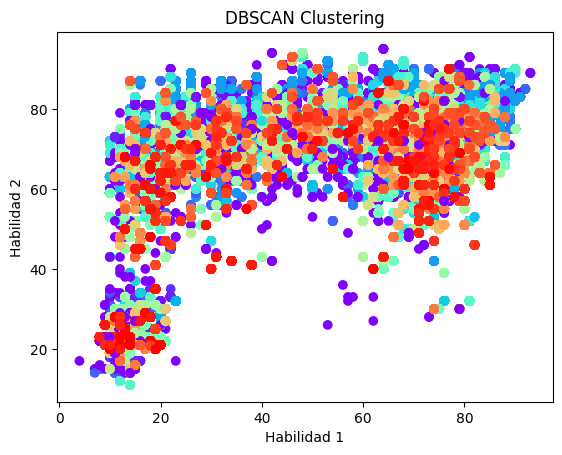

In [ ]:

# Si deseas graficar los resultados (solo para propósitos de visualización, asumiendo 2D)
# Asumiendo que df_skills_ratings contiene las habilidades y ratings, puedes adaptar esto a tus datos
plt.scatter(df_skills_ratings['defending_sliding_tackle'], df_skills_ratings['attacking_short_passing'], c=labels, cmap='rainbow')
plt.xlabel('Habilidad 1')
plt.ylabel('Habilidad 2')
plt.title('DBSCAN Clustering')
plt.show()



In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_clusters, x='defending_sliding_tackle', y='attacking_short_passing', z='skill_ball_control', color='dbscan_clusters')

fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1),
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show(renderer="colab")

Se prueba modificar los Ajustar los parámetros eps y min_samples

Un valor de eps más grande hará que el algoritmo considere un rango más amplio de vecinos, lo que podría resultar en clusters más grandes. Un valor más alto de min_samples requerirá que los puntos tengan más vecinos cercanos para formar un cluster, lo que puede reducir la cantidad de clusters pequeños.

No se obtuvo un buen resultado

# 5 - Análisis cualitativo



En cada cluster se encuentran las habilidades y caracteristicas de las jugadoras y a partir de las tecnicas aplicadas se pueden agrupar en diferentes grupos segun dichas habilidades o caracteristicas similares. En resumen, los clusters se forman principalmente en función de la similitud en las habilidades y características de las jugadoras en el conjunto de datos. Asimismo el clustering basado en habilidades puede ser útil para agrupar jugadores con habilidades técnicas similares, pero no garantiza automáticamente que sean equivalentes en términos de cumplir el mismo rol en un equipo. Para determinar la equivalencia efectiva, es necesario considerar el contexto, la posición, el estilo de juego y la estrategia del equipo. Además, puede ser necesario realizar un análisis más detallado y específico para determinar la idoneidad de una jugadora para un rol particular en un equipo.


A continuacion hacemos un analisis diferenciando las tecnicas utilizadas.

**Analisis a partir de utilizar la tecnica K-Medias**

Los clusters que hemos obtenido parecen ser heterogéneos en términos de las habilidades de las jugadoras. Esta heterogeneidad se refleja en las diferencias significativas en las estadísticas de las habilidades entre los clusters. Aquí hay algunas razones que sugieren que los clusters son heterogéneos:

1. **Diferencias en las Medias:** Las diferencias en las medias de las habilidades entre los clusters son notables. Por ejemplo, la media de "defending_marking_awareness" varía desde alrededor de 14 en el Cluster 1 hasta más de 74 en el Cluster 3. Estas diferencias indican que las jugadoras en estos clusters tienen niveles significativamente diferentes de habilidades en esa categoría.

2. **Diferencias en las Desviaciones Estándar:** Además de las diferencias en las medias, las desviaciones estándar también varían entre los clusters. Esto sugiere que no solo las medias son diferentes, sino que también hay variabilidad dentro de cada cluster en términos de las habilidades de las jugadoras. Por ejemplo, el Cluster 0 tiene una desviación estándar de "defending_marking_awareness" más alta que el Cluster 1, lo que indica que hay una mayor variabilidad en las habilidades dentro de ese cluster.

3. **Rangos Diferentes:** Los rangos (min-max) de las habilidades también difieren entre los clusters. Por ejemplo, en el Cluster 0, el rango de "defending_marking_awareness" va desde 22 hasta 94, mientras que en el Cluster 1, el rango es mucho más estrecho, de 4 a 26. Estos diferentes rangos indican que las jugadoras en estos clusters tienen diferencias sustanciales en sus niveles de habilidad.

En general, la presencia de diferencias significativas en las medias, desviaciones estándar y rangos entre los clusters sugiere que los clusters son heterogéneos en términos de habilidades.

La agrupación de jugadoras en clusters específicos puede deberse a varias razones, y las diferencias en tamaño (número de jugadoras en cada cluster) pueden ser el resultado de diversas influencias y características de los datos. Algunas razones posibles por las cuales las jugadoras pueden haber sido agrupadas en clusters y por qué los clusters pueden tener tamaños diferentes:

Similitud en Habilidades: El algoritmo de clustering busca agrupar a las jugadoras que tienen habilidades similares en ciertas dimensiones (por ejemplo, habilidades defensivas, habilidades de ataque, etc.). Si un grupo de jugadoras tiene habilidades similares en estas dimensiones, es probable que sean agrupadas en el mismo cluster.

Posición en el Campo: Las jugadoras que desempeñan roles similares en el campo tienden a tener habilidades similares. Por ejemplo, los defensores centrales pueden tener habilidades defensivas más altas, mientras que los mediocampistas ofensivos pueden tener habilidades de ataque superiores. Esto puede influir en la agrupación.

Estilo de Juego: El estilo de juego de un jugador, su enfoque en la defensa o el ataque, y su forma de jugar pueden influir en las habilidades que desarrollan. Las jugadoras con estilos de juego similares pueden agruparse en el mismo cluster.

Variabilidad en el Conjunto de Datos: La variabilidad en el conjunto de datos, es decir, la gama de habilidades y características presentes en las jugadoras, puede influir en la formación de clusters. Si hay una gran diversidad en las habilidades de las jugadoras, es más probable que se formen clusters más grandes y heterogéneos.

Selección de K (Número de Clusters): La elección del número de clusters (K) también puede influir en el tamaño y la composición de los clusters. Un valor de K más alto tiende a generar clusters más pequeños y especializados, mientras que un valor de K más bajo produce clusters más grandes y generalizados.

Ruido en los Datos: La presencia de ruido en los datos, es decir, datos inexactos o atípicos, puede influir en la formación de clusters. Los valores extremos o datos incorrectos pueden afectar la agrupación.

Las diferencias en tamaño entre los clusters pueden deberse a la distribución de las jugadoras en función de esas similitudes y diferencias en sus habilidades y roles en el campo. También puede estar influenciado por decisiones de modelado, como la elección de K y la presencia de ruido en los datos.

**Analisis a partir de utilizar la tecnica DBSCAN**

Los clusters que se generaron utilizando el algoritmo DBSCAN parecen ser bastante heterogéneos en función de las estadísticas de los atributos que consideramos. Esto se evidencia en la amplia variabilidad de las estadísticas dentro de cada cluster, como se muestra en el resumen estadístico. Por ejemplo, dentro de un mismo cluster, se puede encontrar jugadores con valores mínimos y máximos diferentes en varias estadísticas, lo que indica una diversidad en las habilidades de los jugadores agrupados en ese cluster.

La heterogeneidad de los clusters puede deberse a varios factores, como la elección de las características utilizadas para la agrupación, la variabilidad natural en los datos de los jugadores y la configuración de los parámetros del algoritmo DBSCAN (como el valor de epsilon y el número mínimo de muestras).

Las diferencias en el tamaño de los clusters pueden deberse a la Configuración de parámetros del algoritmo: Los parámetros que utilizamos al aplicar el algoritmo DBSCAN, como el valor de épsilon (radio máximo de búsqueda) y el número mínimo de muestras en un cluster, pueden influir en el tamaño de los clusters.

# 6 - Transformación

In [ ]:
from sklearn import (manifold, preprocessing, decomposition)
import time

In [ ]:
df_pca=df.copy()
df_pca = df_pca.fillna(0)
X = df_pca[skills_ratings]

# Crear una instancia de PCA con el número de componentes deseados
n_components = 2  # Número de componentes principales para la visualización
pca = PCA(n_components=n_components)

# Aplicar PCA a los datos
X_pca = pca.fit_transform(X)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])

# Concatenar el DataFrame PCA con el DataFrame original para mantener información adicional
df_pca = pd.concat([df_pca , df_pca], axis=1)

# Visualizar los resultados de PCA
#print(df_pca.head())

# Variabilidad explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.53147536 0.24471088]


In [ ]:

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)

km.fit(df_pca) #utiliza todas las habilidades: 34 dimensiones

df_pca['cluster_label'] = km.labels_
clusters = km.labels_

category_counts = df_pca['cluster_label'].value_counts()
print(category_counts)

1    60219
3    51999
2    46403
0    22740
Name: cluster_label, dtype: int64


In [ ]:
df_pca.head()

Componente 1  Componente 2  Componente 1  Componente 2  cluster_label
0    -97.323187     67.143034    -97.323187     67.143034              1
1    -76.265250    -67.616800    -76.265250    -67.616800              3
2    -99.591775     55.001865    -99.591775     55.001865              1
3    -92.011855     71.458277    -92.011855     71.458277              1
4   -117.771434    -42.316620   -117.771434    -42.316620              3

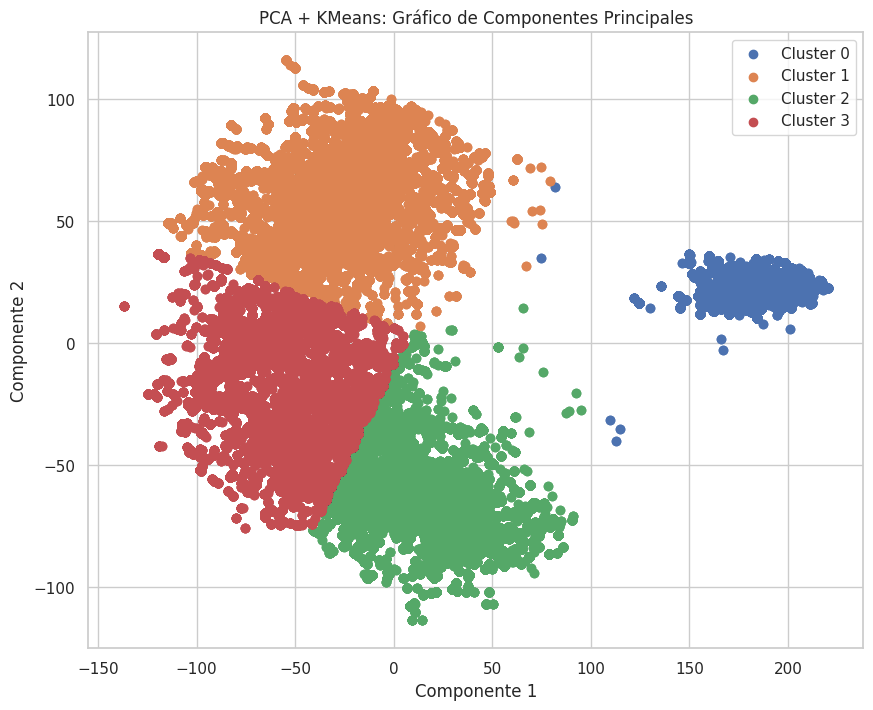

In [ ]:
# Configurar el estilo de las gráficas
plt.figure(figsize=(10, 8))

# Graficar los resultados de PCA y KMeans con colores basados en las etiquetas de clúster
for cluster_id in range(n_clust):
    cluster_data = df_pca[df_pca['cluster_label'] == cluster_id]
    plt.scatter(cluster_data['Componente 1'], cluster_data['Componente 2'], label=f'Cluster {cluster_id}')

plt.title('PCA + KMeans: Gráfico de Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

PRUEBO LO MISMO DE PCA CON DBSCAN PARA VER MEJORAS


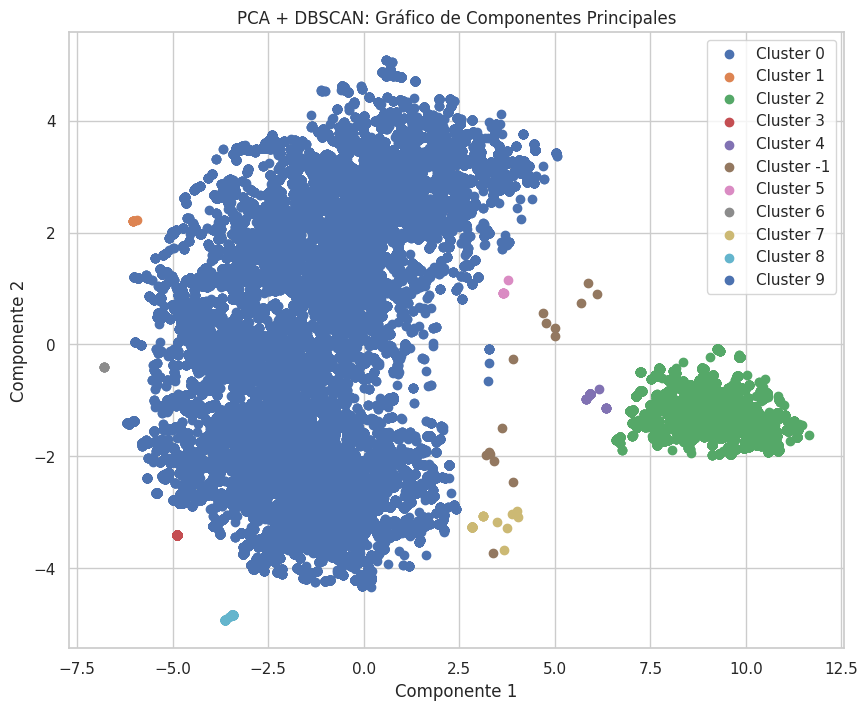

In [ ]:
X = df_skills_ratings

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Aplicar DBSCAN a los datos transformados por PCA
eps = 0.5 # Radio máximo para considerar vecinos
min_samples = 5  # Mínimo de muestras en un vecindario para considerar un core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_pca)

# Crear un DataFrame con los resultados de PCA y etiquetas de clúster DBSCAN
df_clusters = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_clusters['dbscan_clusters'] = labels

# Configurar el estilo de las gráficas
plt.figure(figsize=(10, 8))

# Graficar los resultados de DBSCAN sobre las componentes principales usando plt.scatter
for cluster_id in df_clusters['dbscan_clusters'].unique():
    cluster_data = df_clusters[df_clusters['dbscan_clusters'] == cluster_id]
    plt.scatter(cluster_data['Componente 1'], cluster_data['Componente 2'], label=f'Cluster {cluster_id}')

plt.title('PCA + DBSCAN: Gráfico de Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.show()

Util como preprocesamiento para mejorar la visualización del problema sin necesidad de buscar a priori 2 variables que permitan visualizar correctamente.
Permite disminuir optimamente las caracteristicas.

